# Goal

1. Our goal is to build a basic soybean yield model to predict the final yearly yield of that crop.  We will use features such as temperature (avg) and precipitation, US state, NDVI (measure of quality), podcount and test a shift operator to test the hypothesis that technolical change in the last few years has significantly, on linearly, increased yields

1. Yearly yields:
    
    <font size="3"> $$ Yields_{y} \sim PodCount_{m} + State_{y} + Temp_{m} + Precip_{m} + NDVI_{m} + Shift + error_{y} $$ </font>
    

# Long term Goals:
1. Automate process of modeling yield forecasts.
2. Incorporate global data.
3. Provide a range of forecasts.

# Immediate Goals:
1. Use US data to forecast soybean yields.
2. Automate downloading of data and model scoring.
3. Provide figures.
4. Test and compare several forecasting methods.

# <u>Features</u>

## Yields

### Hypothsis: Historical yields are a good indicator of future yields.

1. Plots clearly show a significant trend.

## Pod Count

### Hypothesis: A good pod count indicates a good final yield.

1. We aren't interested in the final pod count, rather the intermediate counts as a way to predict the final yields (which is highly related to the count).
2. So we need the pod counts for several intermediate months.



## Weather Features

1. Bad weather in particular months will damage the soybean crops.  
2. Look at min, max and precipitation.
3. Try to identify patterns in extreme events.

## Pod count
1. This is another feature examining the quality of a crop at a particular moment.


# <u>Models</u>

## Simple Trend

1. Just draw a line that fits the data

In [48]:
import pandas as pd
yld1 = pd.read_csv("data_model_ready/model_allStates_yields.csv")
yld1.set_index('Year', inplace=True, drop=False)
iowa1 = yld1[yld1["State"] == "IOWA"]

In [87]:
real1 = iowa1.tail(5)["Yield"]

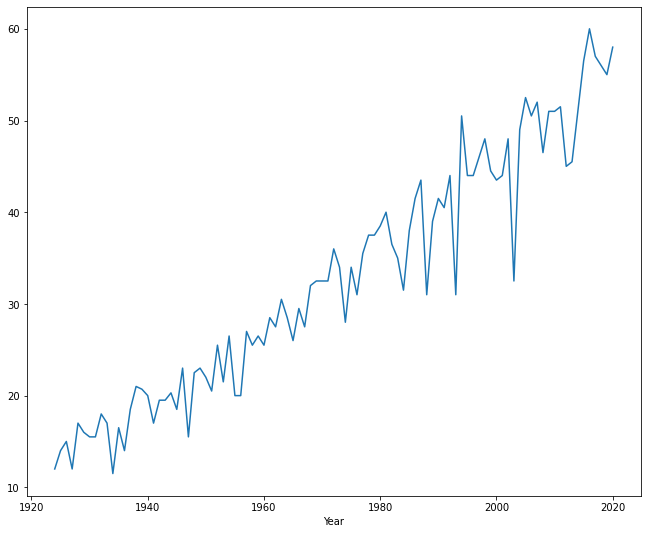

In [50]:
iowa1["Yield"].plot(figsize=(11, 9))

In [51]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
test1 = iowa1[iowa1["Year"] < 2016]

results = smf.ols('Yield ~ Year', data=test1).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     1058.
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           1.51e-51
Time:                        09:14:10   Log-Likelihood:                -242.68
No. Observations:                  92   AIC:                             489.4
Df Residuals:                      90   BIC:                             494.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -829.0173     26.452    -31.340      0.0

In [52]:
ypred = results.predict(test1["Year"])
print(ypred)

Year
1924    11.566971
1925    12.003865
1926    12.440759
1927    12.877653
1928    13.314547
          ...    
2011    49.576757
2012    50.013651
2013    50.450546
2014    50.887440
2015    51.324334
Length: 92, dtype: float64


In [71]:

Xnew = pd.DataFrame({"Year": list(range(2016, 2021))})
Xnewl = list(range(2016, 2021))
Xnewc = sm.add_constant(Xnew)
Xnewc

ynewpred =  results.predict(Xnewc) # predict out of sample
print(ynewpred)

0    51.761228
1    52.198122
2    52.635016
3    53.071910
4    53.508804
dtype: float64


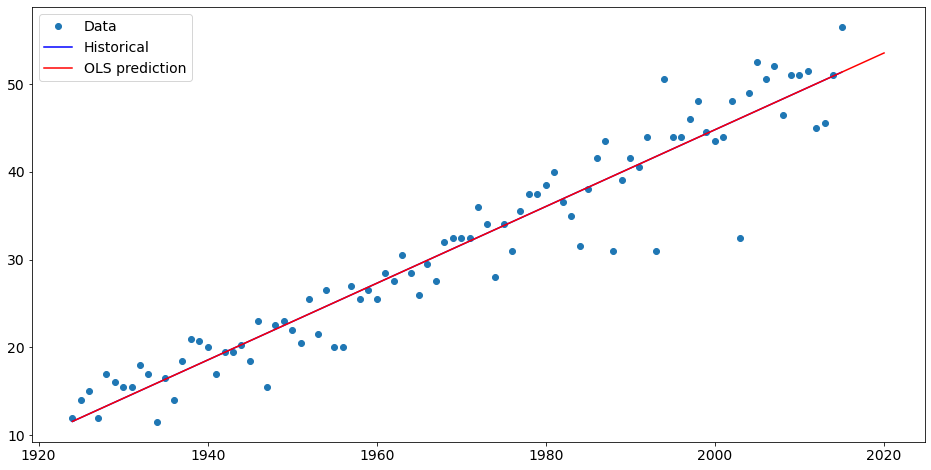

In [76]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

fig, ax = plt.subplots()
ax.plot(test1["Year"], test1["Yield"], 'o', label="Data")
ax.plot(test1["Year"], ypred, 'b-', label="Historical")
ax.plot(np.hstack((test1["Year"], Xnewl)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
ax.legend(loc="best")

In [103]:
results2 = smf.ols('Yield ~ Year + I(Year**2)', data=test1).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     536.3
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           2.25e-50
Time:                        09:59:11   Log-Likelihood:                -241.64
No. Observations:                  92   AIC:                             489.3
Df Residuals:                      89   BIC:                             496.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2287.1059   2180.658      1.049   

In [105]:
Xnew = pd.DataFrame({"Year": list(range(2016, 2021))})
Xnewc = sm.add_constant(Xnew)
Xnewc

ynewpred2 =  results2.predict(Xnewc) # predict out of sample
print(ynewpred2)

0    52.931916
1    53.444338
2    53.958368
3    54.474004
4    54.991247
dtype: float64


In [106]:
from IPython.display import HTML, display
import tabulate
table = [["Year", "Real", "Trend", "Trend+"],
         ["2016", 60.0, 51.9, 52.9],
         ["2017", 57.0,  52.2, 53.4],
         ["2018", 56.0, 52.6, 54.0],
         ["2019", 55.0, 53.1, 54.5],
        ["2020", 58.0, 53.5, 55.]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Year,Real,Trend,Trend+
2016,60.0,51.9,52.9
2017,57.0,52.2,53.4
2018,56.0,52.6,54.0
2019,55.0,53.1,54.5
2020,58.0,53.5,55.0
